# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
import math
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("run3_1.pkl")


In [3]:
xtest = pd.read_pickle("xtest_run3_1.pkl")
ytest = pd.read_pickle("ytest_run3_1.pkl")
events_test = pd.read_pickle("events_test_run3_1.pkl")

In [4]:
events_test.keys()

Index(['true', 'p', 'ecal', 'hcal', 'ho', 'eta', 'phi', 'charge', 'dr',
       'Eecal', 'Ehcal', 'pfcID', 'pfcs', 'correcal', 'corrhcal', 'Ccorrecal',
       'Ccorrhcal', 'run', 'evt', 'lumiBlock', 'time'],
      dtype='object')

# Definitions:

In [5]:
Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int = [0,1,2,3,4,5,10,50,100,200,1000]
def Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 10
    if n == 6:
        lowPt = 10
        highPt = 50
    if n == 7:
        lowPt = 50
        highPt = 100
    if n == 8:
        lowPt = 100
        highPt = 1000
    if n == 9:
        lowPt = 1000
        highPt = 10000
    
    return lowPt, highPt    

In [6]:
Ptrange_0_2_4_7_10_int = [0,2,4,7,10]
def Ptrange_0_2_4_7_10(n):
    if n == 0:
        lowPt = 0
        highPt = 2
    if n == 1:
        lowPt = 2
        highPt = 4
    if n == 2:
        lowPt = 4
        highPt = 7
    if n == 3:
        lowPt = 7
        highPt = 10
    
    return lowPt, highPt 


In [7]:
Ptrange_0_1_10_100_1000_int = [0,1,10,100,1000]
def Ptrange_0_1_10_100_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 10
    if n == 2:
        lowPt = 10
        highPt = 100
    if n == 3:
        lowPt = 100
        highPt = 1000
    
    return lowPt, highPt   

In [8]:
Ptrange_0_10_1000_int = [0,10,1000]
def Ptrange_0_10_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 1000
    
    return lowPt, highPt   

In [9]:
Ptrange_0_10_500_1000_1500_int = [0,10,500,1000,1500]
def Ptrange_0_10_500_1000_1500(n):
    if n == 0:
        lowPt = 0
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 500
    if n == 2:
        lowPt = 0
        highPt = 1000
    if n == 3:
        lowPt = 10
        highPt = 1500
    
    return lowPt, highPt   

In [10]:
Ptrange_6_10_100_300_1000_int = [6,10,100,300,1000]
def Ptrange_6_10_100_300_1000(n):
    if n == 0:
        lowPt = 6
        highPt = 10
    if n == 1:
        lowPt = 10
        highPt = 100
    if n == 2:
        lowPt = 100
        highPt = 300
    if n == 3:
        lowPt = 300
        highPt = 1000
    
    return lowPt, highPt 

In [11]:
Ptrange_0_x5_1x_1x5_2x5_int = [0,.5,1,1.5,2.5]
def Ptrange_0_x5_1x_1x5_2x5(n):
    if n == 0:
        lowPt = 0
        highPt = .5
    if n == 1:
        lowPt = .5
        highPt = 1
    if n == 2:
        lowPt = 1
        highPt = 1.5
    if n == 3:
        lowPt = 1.5
        highPt = 2.5
    
    return lowPt, highPt 

# Variables:

In [12]:
ytest


1222    181.286774
7856    111.096825
9926     74.463295
5300     90.436188
2643     84.654823
           ...    
3269    186.771194
5237    180.970901
5675     70.762207
3144    150.275284
5088     62.990517
Name: true, Length: 1200, dtype: float32

In [13]:
'''tgtvar = []
for i in range(len(ytest)):
    tgtvar.extend(ytest.iloc[i])'''

'tgtvar = []\nfor i in range(len(ytest)):\n    tgtvar.extend(ytest.iloc[i])'

# Loading models and making predicitons:

In [14]:
XGBR = pickle.load(open('XGBR_model_run3_1.sav', 'rb'))
ETR = pickle.load(open('ETR_model_run3_1.sav', 'rb'))

#NSVR = pickle.load(open('NSVR_model_FULL_PT1.sav', 'rb'))
#SVR = pickle.load(open('SVR_model_FULL_PT1.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model_run3_1.sav', 'rb'))
ADA = pickle.load(open('ADA_model_run3_1.sav', 'rb'))
KNR = pickle.load(open('KNR_model_run3_1.sav', 'rb'))
RFR = pickle.load(open('RFR_model_run3_1.sav', 'rb'))

In [15]:
ypred_XGBR = np.array(XGBR.predict(xtest, ntree_limit=XGBR.best_ntree_limit))
ypred_ETR = np.array(ETR.predict(xtest))
#ypred_NSVR = np.array(NSVR.predict(xtest))
#ypred_SVR = np.array(SVR.predict(xtest))
ypred_HGBR = np.array(HGBR.predict(xtest))
ypred_ADA = np.array(ADA.predict(xtest))
ypred_KNR = np.array(KNR.predict(xtest))
ypred_RFR = np.array(RFR.predict(xtest))

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [16]:
ETR.score(xtest,ytest)

0.9198392027340051

In [17]:
ypred_ETR

array([178.07996643, 110.83545792,  52.49444485, ..., 111.65324104,
       155.81670746,  59.05675449])

In [18]:
ytest

1222    181.286774
7856    111.096825
9926     74.463295
5300     90.436188
2643     84.654823
           ...    
3269    186.771194
5237    180.970901
5675     70.762207
3144    150.275284
5088     62.990517
Name: true, Length: 1200, dtype: float32

In [19]:
'''ypred_XGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_XGBR[i]) for i in range(len(ypred_XGBR))]
ypred_ETR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ETR[i]) for i in range(len(ypred_ETR))]
#ypred_NSVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_NSVR[i]) for i in range(len(ypred_NSVR))]
#ypred_SVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_SVR[i]) for i in range(len(ypred_SVR))]
ypred_HGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_HGBR[i]) for i in range(len(ypred_HGBR))]
ypred_ADA = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ADA[i]) for i in range(len(ypred_ADA))]
ypred_KNR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_KNR[i]) for i in range(len(ypred_KNR))]
ypred_RFR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_RFR[i]) for i in range(len(ypred_RFR))]'''

"ypred_XGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_XGBR[i]) for i in range(len(ypred_XGBR))]\nypred_ETR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ETR[i]) for i in range(len(ypred_ETR))]\n#ypred_NSVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_NSVR[i]) for i in range(len(ypred_NSVR))]\n#ypred_SVR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_SVR[i]) for i in range(len(ypred_SVR))]\nypred_HGBR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_HGBR[i]) for i in range(len(ypred_HGBR))]\nypred_ADA = [xtest['clusrawE'].iloc[i]*math.exp(ypred_ADA[i]) for i in range(len(ypred_ADA))]\nypred_KNR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_KNR[i]) for i in range(len(ypred_KNR))]\nypred_RFR = [xtest['clusrawE'].iloc[i]*math.exp(ypred_RFR[i]) for i in range(len(ypred_RFR))]"

# Creating Dataframe:

In [30]:
eta = np.array(xtest["eta"])[:10000]
phi = np.array(xtest["phi"])[:10000]
hcal = np.array(xtest["hcal"])[:10000]
ecal = np.array(xtest["ecal"])[:10000]
eraw = np.array(events_test['ecal']+events_test['hcal'])[:10000]
etrue = np.array(events_test["true"])[:10000]
ecorr = np.array(events_test['Ccorrecal']+events_test['Ccorrhcal'])[:10000]
genPt = np.array(events_test["p"])[:10000]
tgtvar = np.array(ytest)[:10000]

In [21]:
etrue

array([181.28677 , 111.096825,  74.463295, ...,  70.76221 , 150.27528 ,
        62.990517], dtype=float32)

In [22]:
ecorr

array([158.5593  , 122.019745,  54.988495, ...,  75.69661 , 147.45522 ,
        62.72832 ], dtype=float32)

In [23]:
events_test.keys()

Index(['true', 'p', 'ecal', 'hcal', 'ho', 'eta', 'phi', 'charge', 'dr',
       'Eecal', 'Ehcal', 'pfcID', 'pfcs', 'correcal', 'corrhcal', 'Ccorrecal',
       'Ccorrhcal', 'run', 'evt', 'lumiBlock', 'time'],
      dtype='object')

In [24]:
rawDivGen = np.divide(eraw, etrue)[:10000]
#e91XDivGen = np.divide(e91X,  etrue)[:10000]
xgbrDivGen = np.divide(ypred_XGBR,  tgtvar)[:10000]
etrDivGen = np.divide(ypred_ETR,  tgtvar)[:10000]
#nsvrDivGen = np.divide(ypred_NSVR,  events_test['genEnergy'])[:10000]
corrDivGen = np.divide(ecorr,  etrue)[:10000]
#svrDivGen = np.divide(ypred_SVR,  events_test['genEnergy'])[:10000]
hgbrDivGen = np.divide(ypred_HGBR,  tgtvar)[:10000]
adaDivGen = np.divide(ypred_ADA,  tgtvar)[:10000]
knrDivGen = np.divide(ypred_KNR,  tgtvar)[:10000]
rfrDivGen = np.divide(ypred_RFR,  tgtvar)[:10000]

In [32]:
df = pd.DataFrame({
    #'events':events,
    #genPt':genPt,
    #'genEta':genEta,
    #'clusPt':clusPt,
    'eraw':eraw,
    'ecorr':ecorr,
    #'e91X' :e91X,
    'etrue':etrue,
    'rawDivGen':rawDivGen,
    #'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    #'nsvrDivGen':nsvrDivGen,
    #'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen,
    'genPt':genPt
})
df[['rawDivGen','xgbrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


,rawDivGen,xgbrDivGen,hgbrDivGen,adaDivGen,knrDivGen,rfrDivGen,etrDivGen,corrDivGen
0,1.081044,0.974222,0.993528,0.955360,0.917800,0.875621,0.982311,0.874632
1,0.695415,1.070090,1.037728,1.060144,1.019996,0.986854,0.997647,1.098319
2,0.512344,0.785712,0.783213,0.968431,0.688242,0.478983,0.704971,0.738464
3,0.591544,0.647781,0.621401,0.971664,0.625221,1.205412,0.654838,0.587651
4,0.833023,1.027629,1.074894,1.163589,1.026797,1.295099,1.082949,1.159533
...,...,...,...,...,...,...,...,...
1195,0.840100,0.948035,0.939759,0.820543,1.008744,0.609741,0.977469,1.041295
1196,0.829629,0.991326,1.000258,0.846842,1.045377,0.629434,0.971327,0.927969
1197,0.905744,1.333484,1.425911,1.366415,1.981248,1.597985,1.577865,1.069732
1198,1.049334,1.010203,1.036183,1.003136,0.952595,1.056318,1.036875,0.981234


# create columns which bins corrE/genE for each regression

In [33]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
#df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

# create columns which bin genPt

In [34]:
events_test.keys()

Index(['true', 'p', 'ecal', 'hcal', 'ho', 'eta', 'phi', 'charge', 'dr',
       'Eecal', 'Ehcal', 'pfcID', 'pfcs', 'correcal', 'corrhcal', 'Ccorrecal',
       'Ccorrhcal', 'run', 'evt', 'lumiBlock', 'time'],
      dtype='object')

In [35]:
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = np.array(div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int)
df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int, labels = ['0','1','2','3','4','5','6','7','8','9'])

div_bins_0_1_10_100_1000_int = Ptrange_0_1_10_100_1000_int
div_bins_0_1_10_100_1000_int = np.array(div_bins_0_1_10_100_1000_int)
df['binned_genPt_0_1_10_100_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_10_100_1000_int, labels = ['0','1','2','3'])

div_bins_0_10_1000_int = Ptrange_0_10_1000_int
div_bins_0_10_1000_int = np.array(div_bins_0_10_1000_int)
df['binned_genPt_0_10_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_1000_int, labels = ['0','1'])

div_bins_0_10_500_1000_1500_int = Ptrange_0_10_500_1000_1500_int
div_bins_0_10_500_1000_1500_int = np.array(div_bins_0_10_500_1000_1500_int)
df['binned_genPt_0_10_500_1000_1500_int'] = pd.cut(df['genPt'], bins = div_bins_0_10_500_1000_1500_int, labels = ['0','1','2','3'])

div_bins_0_2_4_7_10_int = Ptrange_0_2_4_7_10_int
div_bins_0_2_4_7_10_int = np.array(div_bins_0_2_4_7_10_int)
df['binned_genPt_0_2_4_7_10_int'] = pd.cut(df['genPt'], bins = div_bins_0_2_4_7_10_int, labels = ['0','1','2','3'])

div_bins_6_10_100_300_1000_int = Ptrange_6_10_100_300_1000_int
div_bins_6_10_100_300_1000_int = np.array(div_bins_6_10_100_300_1000_int)
df['binned_genPt_6_10_100_300_1000_int'] = pd.cut(df['genPt'], bins = div_bins_6_10_100_300_1000_int, labels = ['0','1','2','3'])

div_bins_0_x5_1x_1x5_2x5_int = Ptrange_0_x5_1x_1x5_2x5_int
div_bins_0_x5_1x_1x5_2x5_int = np.array(div_bins_0_x5_1x_1x5_2x5_int)
df['binned_genPt_0_x5_1x_1x5_2x5_int'] = pd.cut(df['genPt'], bins = div_bins_0_x5_1x_1x5_2x5_int, labels = ['0','1','2','3'])

# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [36]:
dict_of_genPt_lists_1 = []
for i in range(0,10):
    dict_of_genPt_lists_1.append(df[df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] == str(i)])
    
dict_of_genPt_lists_2 = []
for i in range(0,10):
    dict_of_genPt_lists_2.append(df[df['binned_genPt_0_1_10_100_1000_int'] == str(i)])
    
dict_of_genPt_lists_3 = []
for i in range(0,10):
    dict_of_genPt_lists_3.append(df[df['binned_genPt_0_10_1000_int'] == str(i)])
    
dict_of_genPt_lists_4 = []
for i in range(0,10):
    dict_of_genPt_lists_4.append(df[df['binned_genPt_0_10_500_1000_1500_int'] == str(i)])
    
dict_of_genPt_lists_5 = []
for i in range(0,10):
    dict_of_genPt_lists_5.append(df[df['binned_genPt_0_2_4_7_10_int'] == str(i)])
    
dict_of_genPt_lists_6 = []
for i in range(0,10):
    dict_of_genPt_lists_6.append(df[df['binned_genPt_6_10_100_300_1000_int'] == str(i)])
    
dict_of_genPt_lists_7 = []
for i in range(0,10):
    dict_of_genPt_lists_7.append(df[df['binned_genPt_0_x5_1x_1x5_2x5_int'] == str(i)])

# RMSE comparisons:

In [38]:
e91XDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
corrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,corrDivGen)).mean()),4)
etrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,etrDivGen)).mean()),4)
xgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,xgbrDivGen)).mean()),4)
hgbrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,hgbrDivGen)).mean()),4)
#svrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,svrDivGen)).mean()),4)
#nsvrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,nsvrDivGen)).mean()),4)
knrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,knrDivGen)).mean()),4)
adaDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,adaDivGen)).mean()),4)
rfrDivGen_RMSE = round(math.sqrt(np.square(np.subtract(1,rfrDivGen)).mean()),4)

RMSEs = pd.DataFrame({'name' : ['e91XDivGen_RMSE', 'corrDivGen_RMSE', 'etrDivGen_RMSE', 'xgbrDivGen_RMSE', 'hgbrDivGen_RMSE', 'knrDivGen_RMSE','rfrDivGen'], 
                     'RMSEs' : [e91XDivGen_RMSE, corrDivGen_RMSE, etrDivGen_RMSE, xgbrDivGen_RMSE, hgbrDivGen_RMSE, knrDivGen_RMSE,rfrDivGen_RMSE]})

In [39]:
RMSEs = RMSEs.set_index('name')

In [40]:
RMSEs['RMSEs']

name
e91XDivGen_RMSE    0.2769
corrDivGen_RMSE    0.1613
etrDivGen_RMSE     0.2769
xgbrDivGen_RMSE    0.2900
hgbrDivGen_RMSE    0.3052
knrDivGen_RMSE     0.3192
rfrDivGen          1.0798
Name: RMSEs, dtype: float64

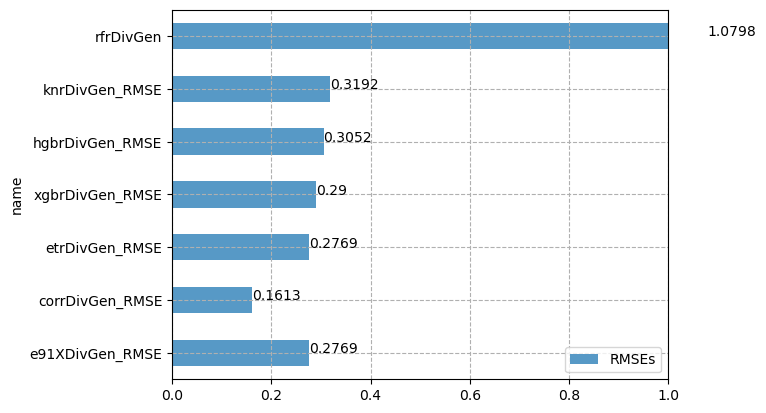

In [42]:

RMSEs.plot( kind='barh',alpha=.75)
plt.xlabel("")
plt.grid('on', ls = '--')
for index, value in enumerate(RMSEs['RMSEs']):
    plt.text(value, index,
             str(RMSEs['RMSEs'][index]))
plt.xlim([0,1])
plt.savefig('RMSEs_tgt.pdf')
plt.show()



# Histograms:

C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:386: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jonla\anaconda4\lib\site-packages\scipy\stats\_continuous_distns.py:391: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())
C:\Users\jonla\anaconda4\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


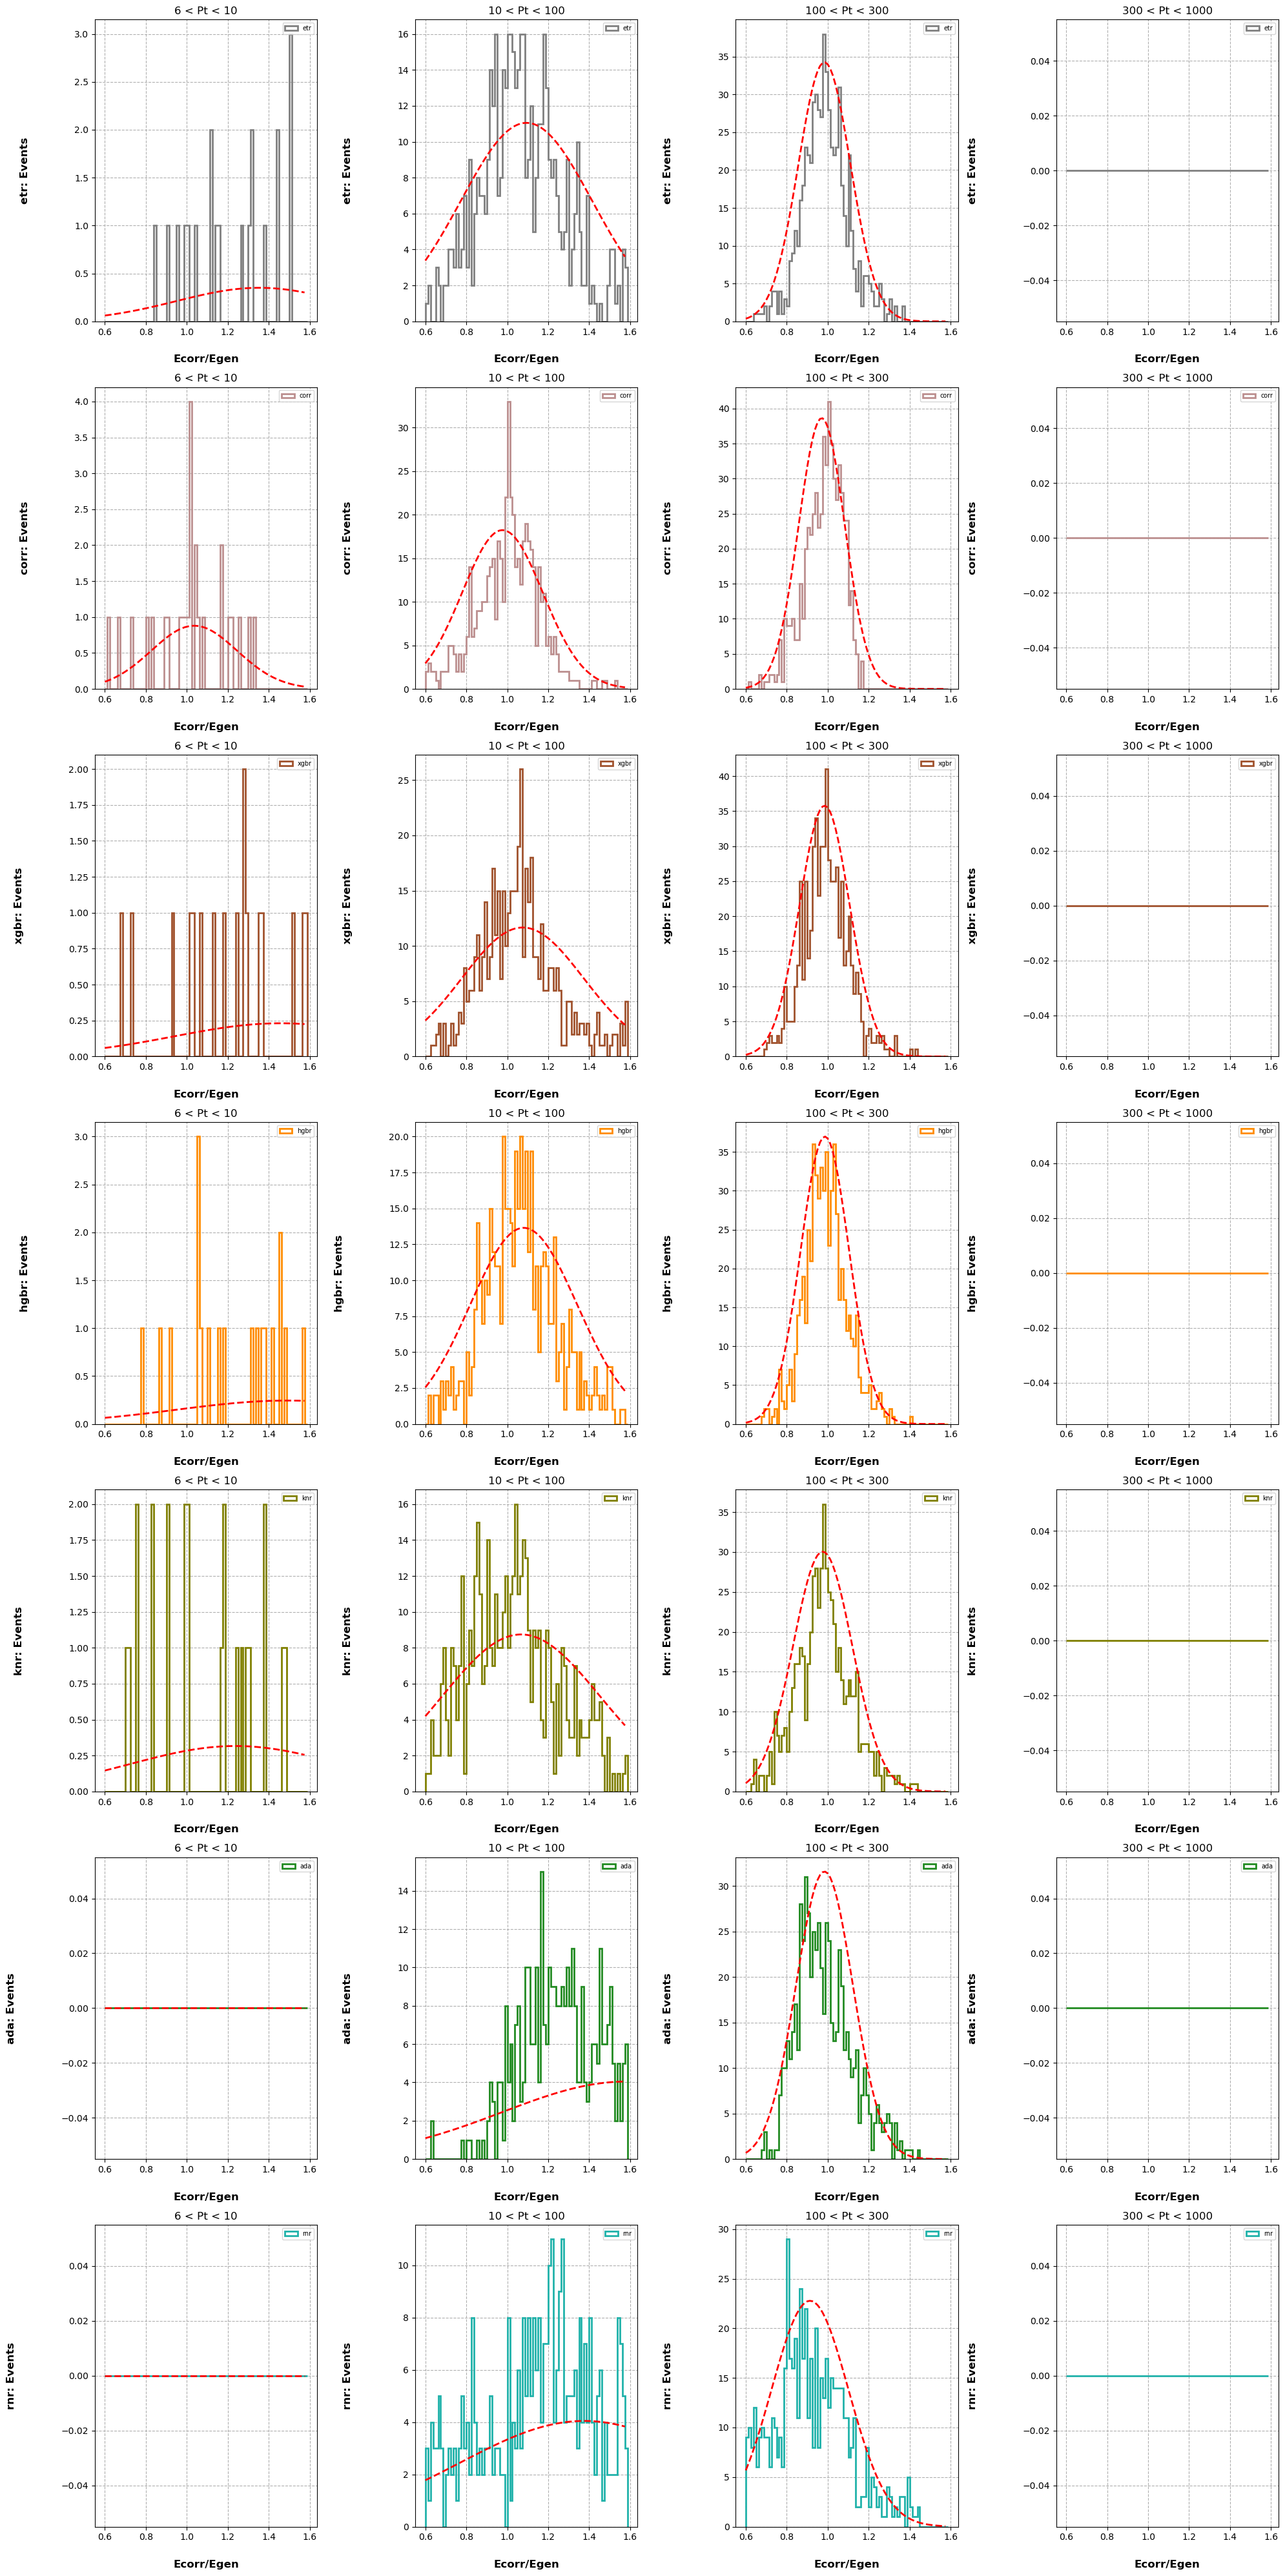

In [45]:
list_of_lists = []

fig, ax4 = plt.subplots(7,4, figsize =(20, 40),sharey=False,tight_layout=True )

for i in range(28):    
    a = i%4
    b = (i - (i%4))/4 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'corr', 'xgbr', 'hgbr', 'knr', 'ada', 'rnr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_6[a]['etrDivGen'],
        #dict_of_genPt_lists_6[a]['e91XDivGen'], 
        dict_of_genPt_lists_6[a]['corrDivGen'],
        dict_of_genPt_lists_6[a]['xgbrDivGen'],
        dict_of_genPt_lists_6[a]['hgbrDivGen'],
        #dict_of_genPt_lists_6[a]['svrDivGen'],
        #dict_of_genPt_lists_6[a]['nsvrDivGen'],
        dict_of_genPt_lists_6[a]['knrDivGen'],
        dict_of_genPt_lists_6[a]['adaDivGen'],
        dict_of_genPt_lists_6[a]['rfrDivGen']
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][b], label = labels[b],color = colors[b], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Ptrange_6_10_100_300_1000(a)[0]) + " < Pt < " + str(Ptrange_6_10_100_300_1000(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][b])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax4[b,a].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("10x4_model_comp.pdf")

# New stuff


In [ ]:
list_of_lists = []

fig, ax4 = plt.subplots(1,1, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(1):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'e91X', 'corr', 'xgbr', 'hgbr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_6[a]['etrDivGen'],
        dict_of_genPt_lists_6[a]['e91XDivGen'], 
        #dict_of_genPt_lists_6[a]['corrDivGen'],
        dict_of_genPt_lists_6[a]['xgbrDivGen'],
        #dict_of_genPt_lists_6[a]['hgbrDivGen'],
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4.hist(list_of_lists[i][b], label = labels[0],color = colors[5], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    count, bins, ignored = ax4.hist(list_of_lists[i][b], label = labels[1],color = colors[1], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    count, bins, ignored = ax4.hist(list_of_lists[i][b], label = labels[3],color = colors[7], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    #count, bins, ignored = ax4[a,b].hist(list_of_lists[i][2], label = labels[3],color = colors[3], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    #count, bins, ignored = ax4[i].hist(list_of_lists[i][4], label = labels[b],color = colors[4], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    
    
    ax4.legend(prop={'size':7})
    ax4.grid('on', ls = '--')
    
    ax4.set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4.set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4.set_title((str(0) + " < Pt < " + str(2.5)))
    
    mun, sigma = norm.fit(list_of_lists[i][0])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax4[i].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("1x1_pt0to2.5_model_PT1_comp.pdf")

In [ ]:
list_of_lists = []

fig, ax4 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    

    #print(b, " , ", a)
    
    labels = ['etr', 'e91X', 'corr', 'xgbr', 'hgbr']
    
    
    list_of_lists.append([
        dict_of_genPt_lists_6[i]['etrDivGen'],
        dict_of_genPt_lists_6[i]['e91XDivGen'], 
        #dict_of_genPt_lists_6[a]['corrDivGen'],
        dict_of_genPt_lists_6[i]['xgbrDivGen'],
        #dict_of_genPt_lists_6[a]['hgbrDivGen'],
        ])
    
    
            
    
    #print(list_of_lists[i][b])
    
    
    colors = ['gray', 'rosybrown', 'sienna', 'darkorange', 'olive', 'forestgreen', 'lightseagreen', 'teal', 'slateblue', 'palevioletred']
    
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][0], label = labels[0],color = colors[5], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][1], label = labels[1],color = colors[1], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    count, bins, ignored = ax4[b,a].hist(list_of_lists[i][2], label = labels[3],color = colors[7], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    #count, bins, ignored = ax4[a,b].hist(list_of_lists[i][2], label = labels[3],color = colors[3], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    #count, bins, ignored = ax4[i].hist(list_of_lists[i][4], label = labels[b],color = colors[4], histtype='step', bins = np.arange(.6,1.6,0.0125),lw = 2)
    
    
    
    ax4[b,a].legend(prop={'size':7})
    ax4[b,a].grid('on', ls = '--')
    
    ax4[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax4[b,a].set_ylabel(labels[b] + ": Events", labelpad=50, weight='bold', size=12)
    #if i < 4: 
    ax4[b,a].set_title((str(Ptrange_6_10_100_300_1000(a)[0]) + " < Pt < " + str(Ptrange_6_10_100_300_1000(a)[1])))
    
    mun, sigma = norm.fit(list_of_lists[i][0])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    #ax4[i].plot(bins, mean*.7* (1/((sigma*.5) * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r', ls = '--')

    
    
plt.savefig("2x2_pt6to1000_model_PT3_comp.pdf")

# Fitting process: